## Descargue las bases de datos

In [1]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`



players_df = pd.read_csv('common_player_info.csv')
 = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [19]:
games_df['season year'] = games_df['season_id'].astype(str).str[1:].astype(int)
games_filtered_seasons = games_df[ (games_df['season year'] >= 1984) & (games_df['season year'] <= 2003) ]

print (games_filtered_seasons.head())


       season_id  team_id_home team_abbreviation_home         team_name_home  \
18174      21984    1610612765                    DET        Detroit Pistons   
18175      21984    1610612744                    GOS  Golden State Warriors   
18176      21984    1610612751                    NJN        New Jersey Nets   
18177      21984    1610612760                    SEA    Seattle SuperSonics   
18178      21984    1610612741                    CHI          Chicago Bulls   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
18174  28400003  1984-10-26 00:00:00  DET vs. BOS       L  240      48.0  ...   
18175  28400006  1984-10-26 00:00:00  GOS vs. PHX       L  240      42.0  ...   
18176  28400004  1984-10-26 00:00:00  NJN vs. ATL       L  240      40.0  ...   
18177  28400001  1984-10-26 00:00:00  SEA vs. UTH       W  240      36.0  ...   
18178  28400005  1984-10-26 00:00:00  CHI vs. WAS       W  240      48.0  ...   

       ast_away  stl_away  blk_a

In [6]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]


Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [20]:
games_playoffs = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']

print(games_playoffs.head())

       season_id  team_id_home team_abbreviation_home      team_name_home  \
19117      41984    1610612755                    PHL  Philadelphia 76ers   
19118      41984    1610612742                    DAL    Dallas Mavericks   
19119      41984    1610612747                    LAL  Los Angeles Lakers   
19120      41984    1610612743                    DEN      Denver Nuggets   
19121      41984    1610612765                    DET     Detroit Pistons   

        game_id            game_date matchup_home wl_home  min  fgm_home  ...  \
19117  48400121  1985-04-17 00:00:00  PHL vs. WAS       W  240      38.0  ...   
19118  48400171  1985-04-18 00:00:00  DAL vs. POR       W  290      54.0  ...   
19119  48400141  1985-04-18 00:00:00  LAL vs. PHX       W  240      61.0  ...   
19120  48400151  1985-04-18 00:00:00  DEN vs. SAN       W  240      57.0  ...   
19121  48400131  1985-04-18 00:00:00  DET vs. NJN       W  240      46.0  ...   

       ast_away  stl_away  blk_away  tov_away  pf_

In [ ]:
# Filtrar solo partidos de Playoffs

# Verificar cuántos partidos de Playoffs quedaron


Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [23]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='left')
player_game_stats = pd.merge(players_combined, games_playoffs, left_on='team_id', right_on='team_id_home', how='left')

print(player_game_stats.head())

   person_id first_name_x last_name_x display_first_last  \
0      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
1      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
2      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
3      76001         Alaa   Abdelnaby     Alaa Abdelnaby   
4      76001         Alaa   Abdelnaby     Alaa Abdelnaby   

  display_last_comma_first display_fi_last     player_slug  \
0          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
1          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
2          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
3          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   
4          Abdelnaby, Alaa    A. Abdelnaby  alaa-abdelnaby   

             birthdate school country  ... ast_away stl_away  blk_away  \
0  1968-06-24 00:00:00   Duke     USA  ...     22.0      4.0       2.0   
1  1968-06-24 00:00:00   Duke     USA  ...     24.0      4.0       1.0   
2  1968-06-24 00:00:00   Duke     USA  ...  

##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [24]:
num_teams = games_playoffs['team_name_home'].nunique()
print(f"Número de equipos participantes en los playoffs (1984-2003): {num_teams}")

Número de equipos participantes en los playoffs (1984-2003): 30


2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [25]:
unique_players_playoffs = player_game_stats['person_id'].nunique()
print(f"Número de jugadores únicos en los Playoffs (1984-2003): {unique_players_playoffs}")


Número de jugadores únicos en los Playoffs (1984-2003): 4171


* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

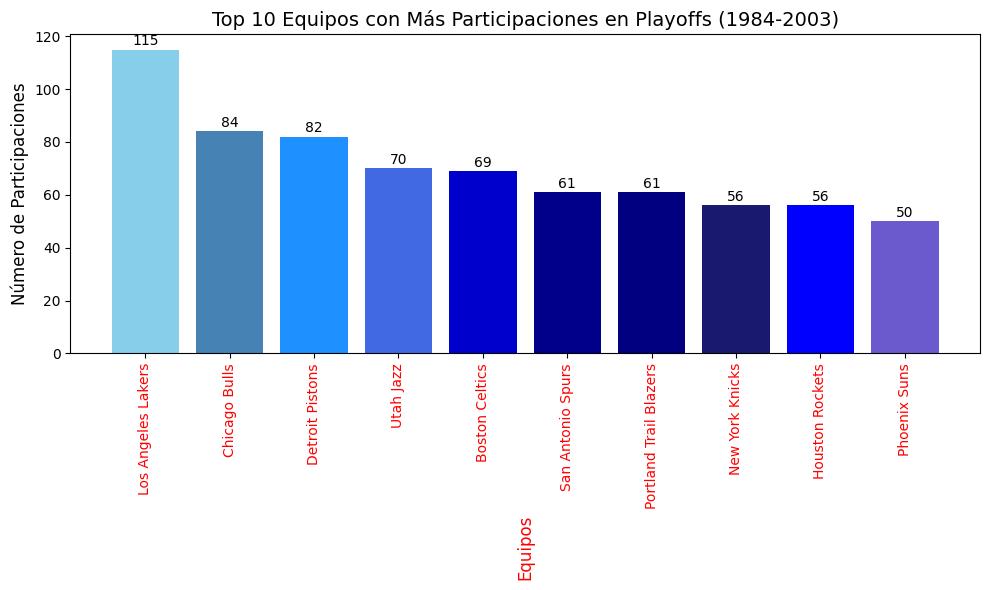

In [26]:
team_counts = games_playoffs['team_name_home'].value_counts()

top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color=['skyblue', 'steelblue', 'dodgerblue', 'royalblue', 'mediumblue', 'darkblue', 'navy', 'midnightblue', 'blue', 'slateblue'])
plt.xlabel('Equipos', color='red', fontsize=12, rotation=90)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Top 10 Equipos con Más Participaciones en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90, color='red')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()



3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003):
team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Name: pts_home, dtype: float64


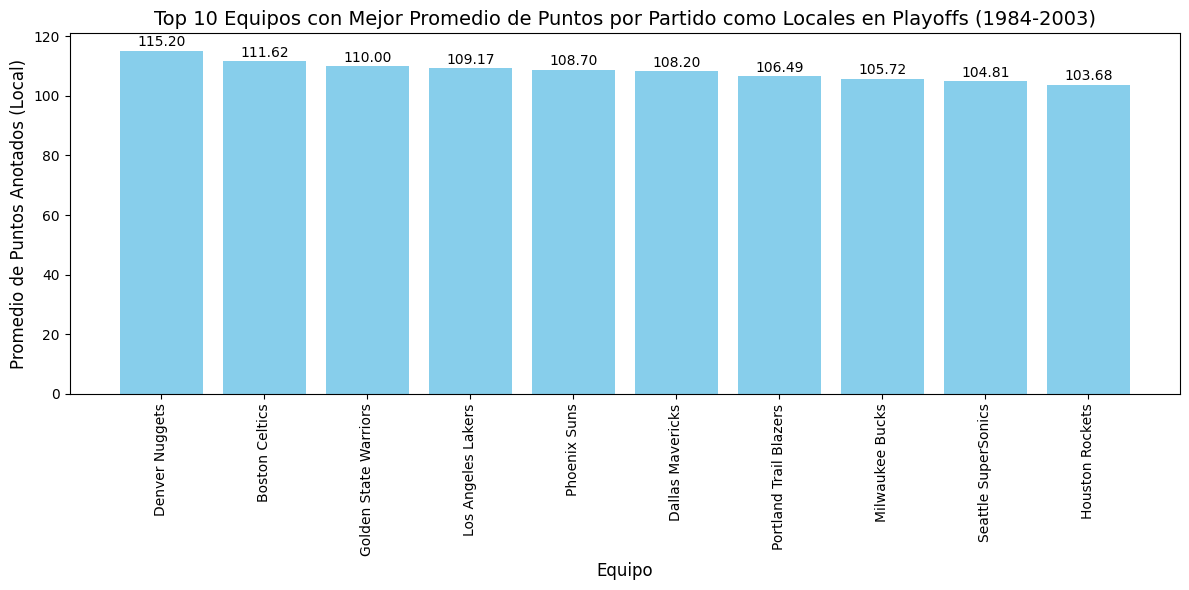

In [27]:
# prompt: Equipos con Mejor Promedio de Puntos por Partido (en Casa) Aquí calculamos el promedio de puntos por partido de cada equipo como local.

# Agrupar por equipo local y calcular el promedio de puntos anotados como local
team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

# Mostrar los 10 equipos con mejor promedio de puntos como locales
print("Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003):")
print(team_avg_points.head(10))

# Crear un gráfico de barras para visualizar los resultados
plt.figure(figsize=(12, 6))
bars = plt.bar(team_avg_points.head(10).index, team_avg_points.head(10).values, color='skyblue')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Promedio de Puntos Anotados (Local)", fontsize=12)
plt.title("Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)

# Agregar etiquetas de valor a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom') # Formato a dos decimales

plt.tight_layout()
plt.show()



* haga un grafico de barras en azul con estos resultados

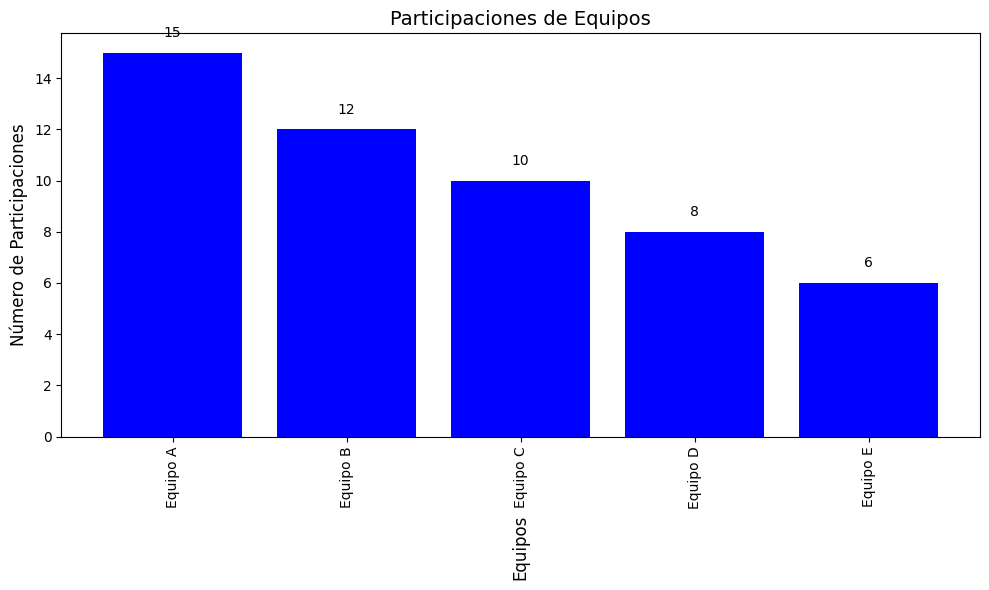

In [28]:
import matplotlib.pyplot as plt

equipos = ['Equipo A', 'Equipo B', 'Equipo C', 'Equipo D', 'Equipo E']
participaciones = [15, 12, 10, 8, 6]

plt.figure(figsize=(10, 6))
plt.bar(equipos, participaciones, color='blue')  # Color azul

plt.xlabel('Equipos', fontsize=12, rotation=90)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Participaciones de Equipos', fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x

for i, v in enumerate(participaciones):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')  # Mostrar el valor de cada barra

plt.tight_layout()
plt.show()

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.


Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003):
team_name_home
Denver Nuggets            115.200000
Boston Celtics            111.623188
Golden State Warriors     110.000000
Los Angeles Lakers        109.165217
Phoenix Suns              108.700000
Dallas Mavericks          108.200000
Portland Trail Blazers    106.491803
Milwaukee Bucks           105.720930
Seattle SuperSonics       104.813953
Houston Rockets           103.678571
Name: pts_home, dtype: float64


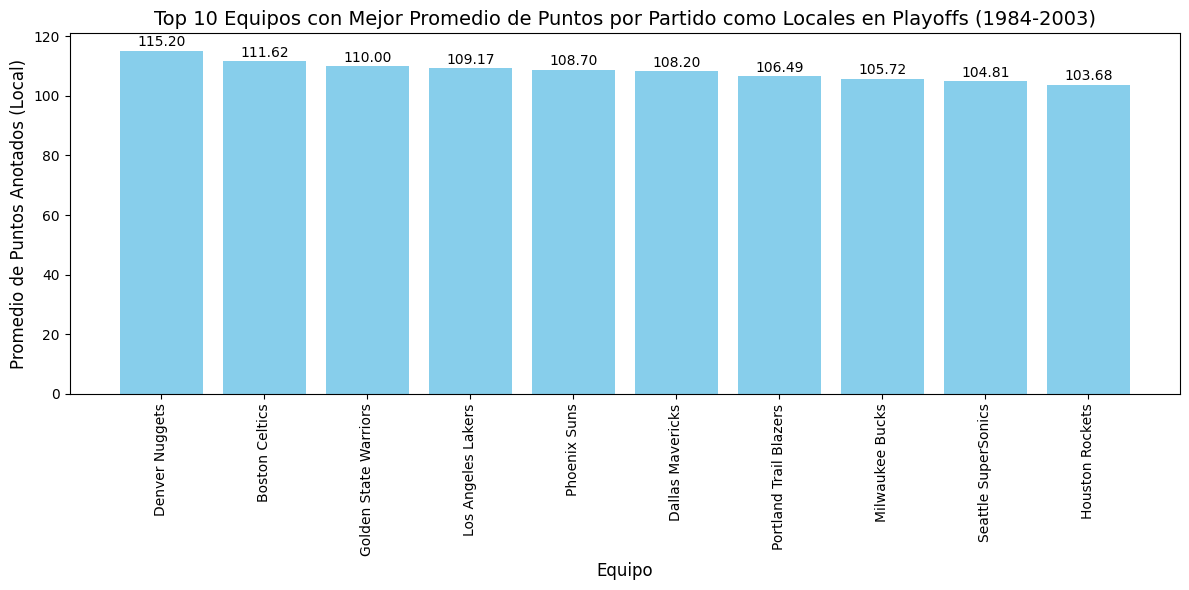

In [29]:
team_avg_points_home = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

print("\nTop 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003):")
print(team_avg_points_home.head(10))

plt.figure(figsize=(12, 6))
bars = plt.bar(team_avg_points_home.head(10).index, team_avg_points_home.head(10).values, color='skyblue')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Promedio de Puntos Anotados (Local)", fontsize=12)
plt.title("Top 10 Equipos con Mejor Promedio de Puntos por Partido como Locales en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom') # Formato a dos decimales

plt.tight_layout()
plt.show()

Hga un grafico en naranja de estos resultados

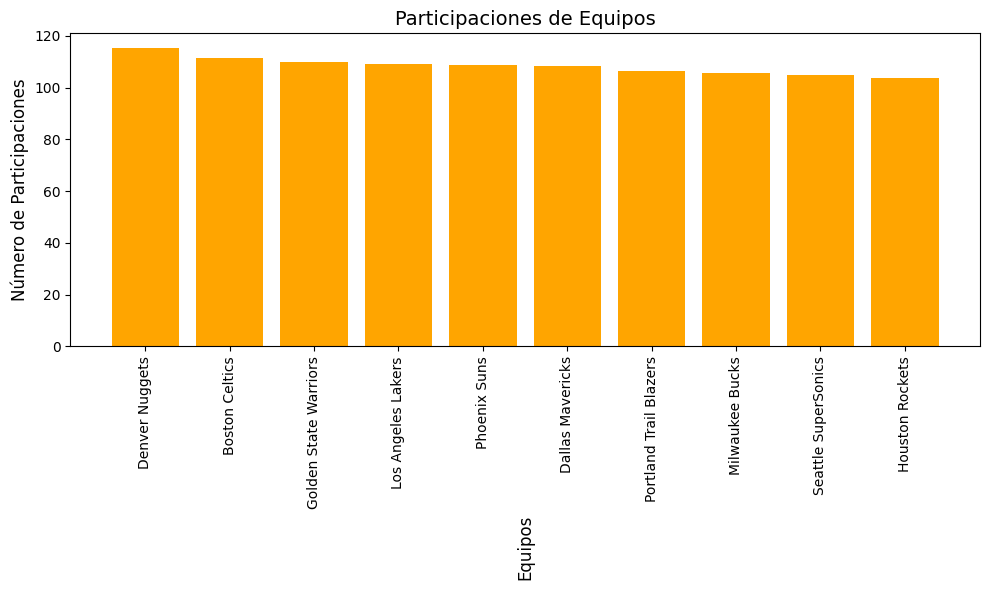

In [31]:
team_avg_points=team_avg_points.head(10)
plt.figure(figsize=(10, 6))
plt.bar(team_avg_points.index,team_avg_points.values, color='orange')  # Color naranja

plt.xlabel('Equipos', fontsize=12, rotation=90)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Participaciones de Equipos', fontsize=14)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x



plt.tight_layout()
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [39]:
# Create 'total_points' column
games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']

# Group by season and sum total points
season_total_points = games_playoffs.groupby('season_id')['total_points'].sum().sort_values(ascending=False)

# Display the results
print("Total Points Scored in Each Season (Playoffs):")
print(season_total_points)

# You can also display the top N seasons if you want
N = 5  # Change this to the desired number of top seasons
print(f"\nTop {N} Seasons with Highest Total Points Scored (Playoffs):")
print(season_total_points.head(N))

Total Points Scored in Each Season (Playoffs):
season_id
42002    16900.0
41987    16691.0
41986    15678.0
41984    15598.0
41989    15195.0
41992    15127.0
41991    15075.0
41985    15057.0
41994    14492.0
42003    14437.0
41990    14165.0
41996    13539.0
42000    13293.0
41988    13003.0
41997    12955.0
41998    11566.0
Name: total_points, dtype: float64

Top 5 Seasons with Highest Total Points Scored (Playoffs):
season_id
42002    16900.0
41987    16691.0
41986    15678.0
41984    15598.0
41989    15195.0
Name: total_points, dtype: float64


<ipython-input-39-8745d425f97f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']


<ipython-input-38-0a81912dc51b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_total_points.index, y=season_total_points.values, palette="Blues_d")


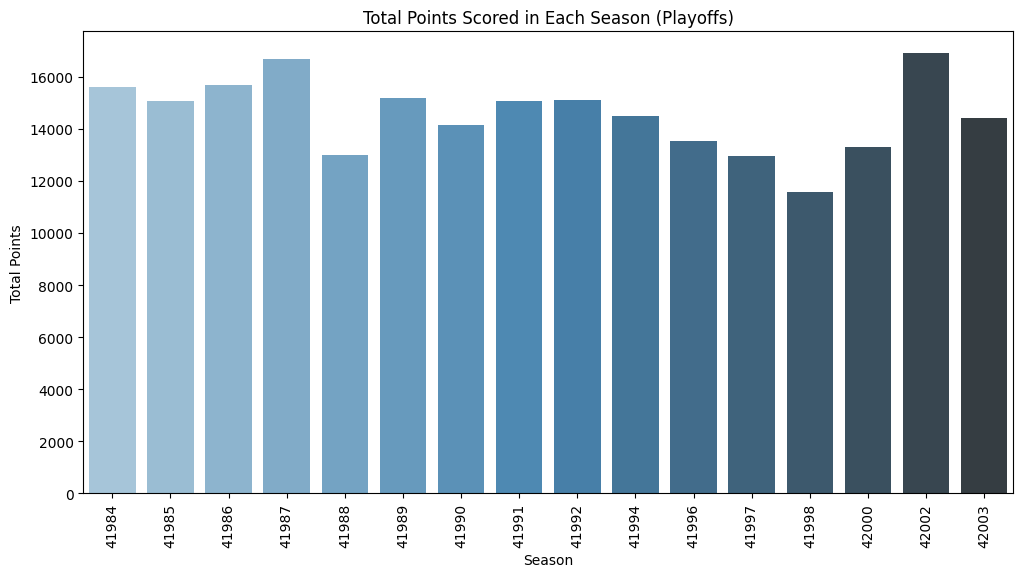

In [38]:
# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=season_total_points.index, y=season_total_points.values, palette="Blues_d")

plt.title('Total Points Scored in Each Season (Playoffs)')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

* Cree una serie de tiempo con esto:

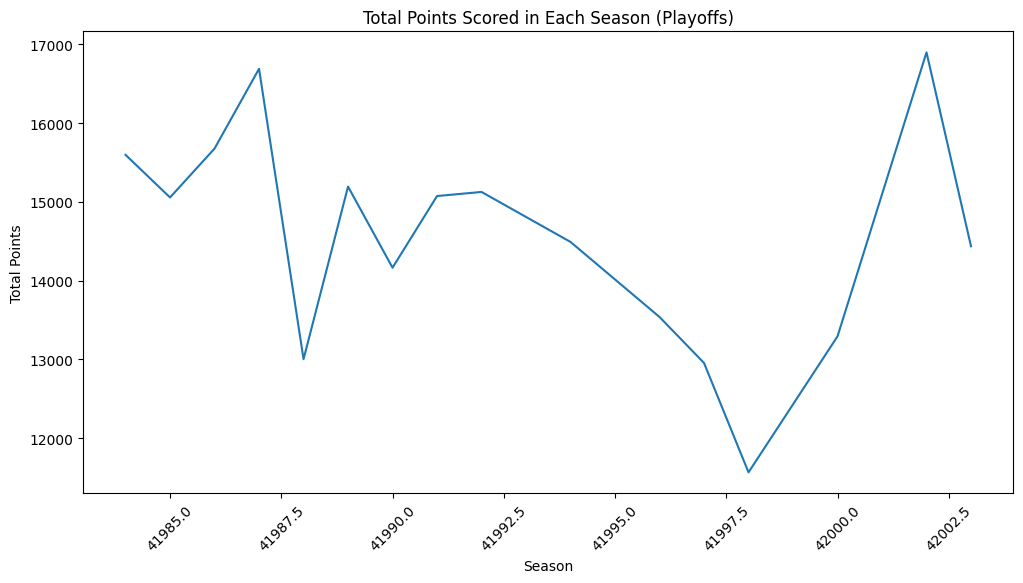

In [37]:
# Convert the season_id index to integers for proper time series plotting
season_total_points.index = season_total_points.index.astype(int)

# Create the time series plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x=season_total_points.index, y=season_total_points.values)

plt.title('Total Points Scored in Each Season (Playoffs)')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

* Hay algun dato interesante en esta graficaa

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [40]:
pivot_table = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home', 'position_y'], aggfunc='mean')

pivot_table

ast_home    pts_home   reb_home
team_name_home     position_y                                  
Atlanta Hawks      C           22.882353   99.382353  41.617647
                   PF          22.882353   99.382353  41.617647
                   PF-SF       22.882353   99.382353  41.617647
                   PG          22.882353   99.382353  41.617647
                   SF          22.882353   99.382353  41.617647
...                                  ...         ...        ...
Washington Bullets PG          18.000000  103.625000  35.500000
                   PG-SG       18.000000  103.625000  35.500000
                   SF          18.000000  103.625000  35.500000
                   SF-SG       18.000000  103.625000  35.500000
                   SG          18.000000  103.625000  35.500000

[241 rows x 3 columns]

* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



                            ast_home    pts_home   reb_home
team_name_home     role                                    
Atlanta Hawks      Ala     22.882353   99.382353  41.617647
                   Base    22.882353   99.382353  41.617647
                   Pivote  22.882353   99.382353  41.617647
Boston Celtics     Ala     26.811594  111.623188  43.652174
                   Base    26.811594  111.623188  43.652174
...                              ...         ...        ...
Utah Jazz          Base    23.042857  100.357143  43.371429
                   Pivote  23.042857  100.357143  43.371429
Washington Bullets Ala     18.000000  103.625000  35.500000
                   Base    18.000000  103.625000  35.500000
                   Pivote  18.000000  103.625000  35.500000

[88 rows x 3 columns]


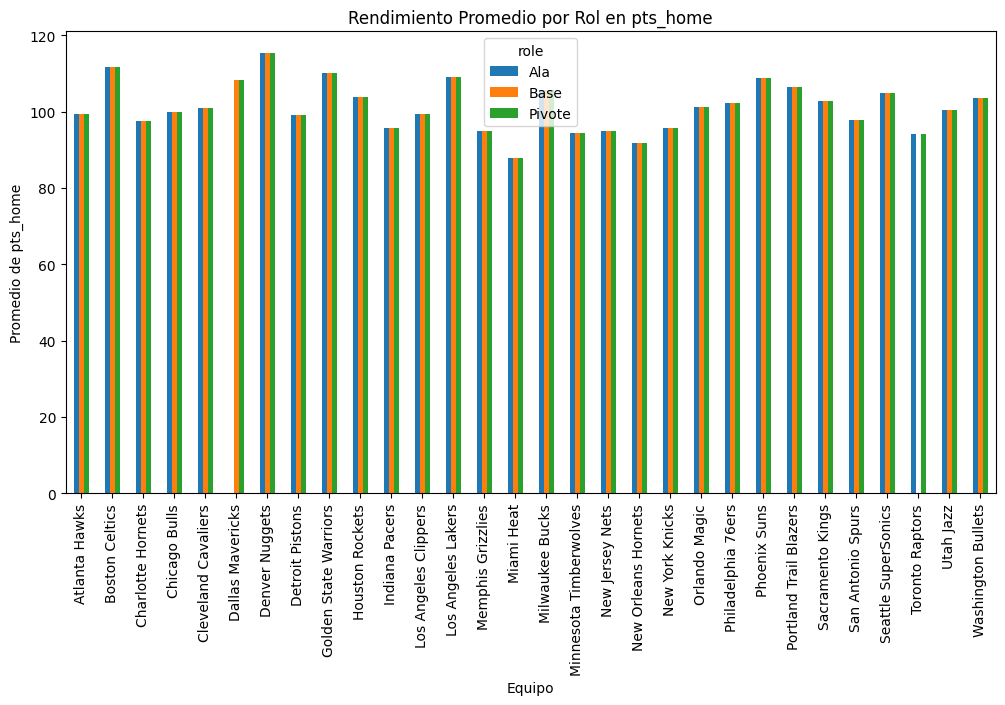

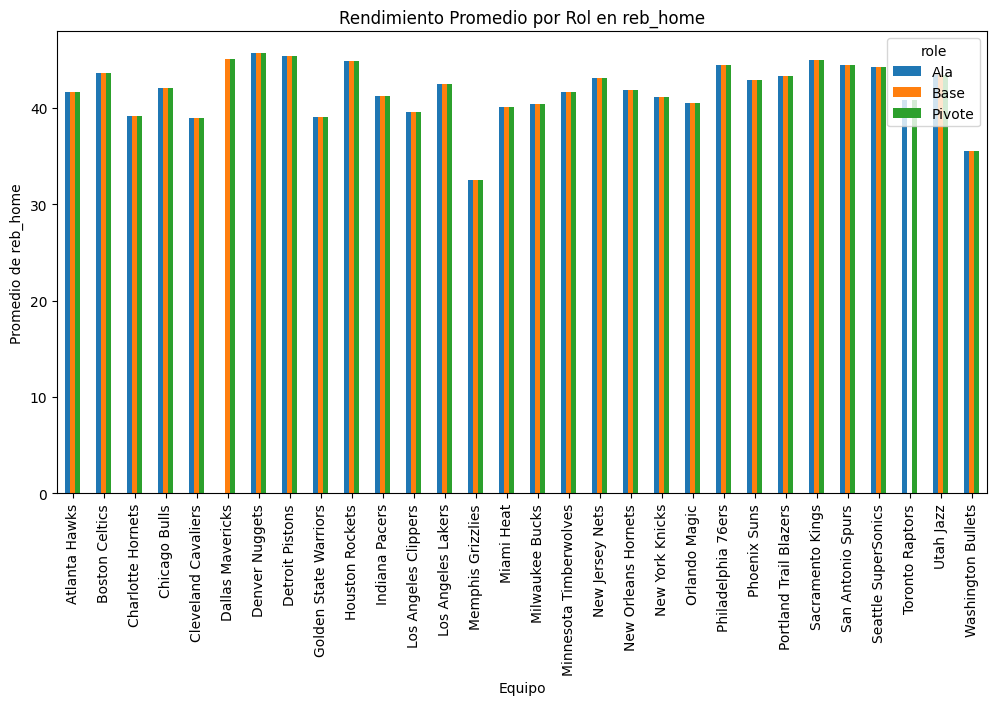

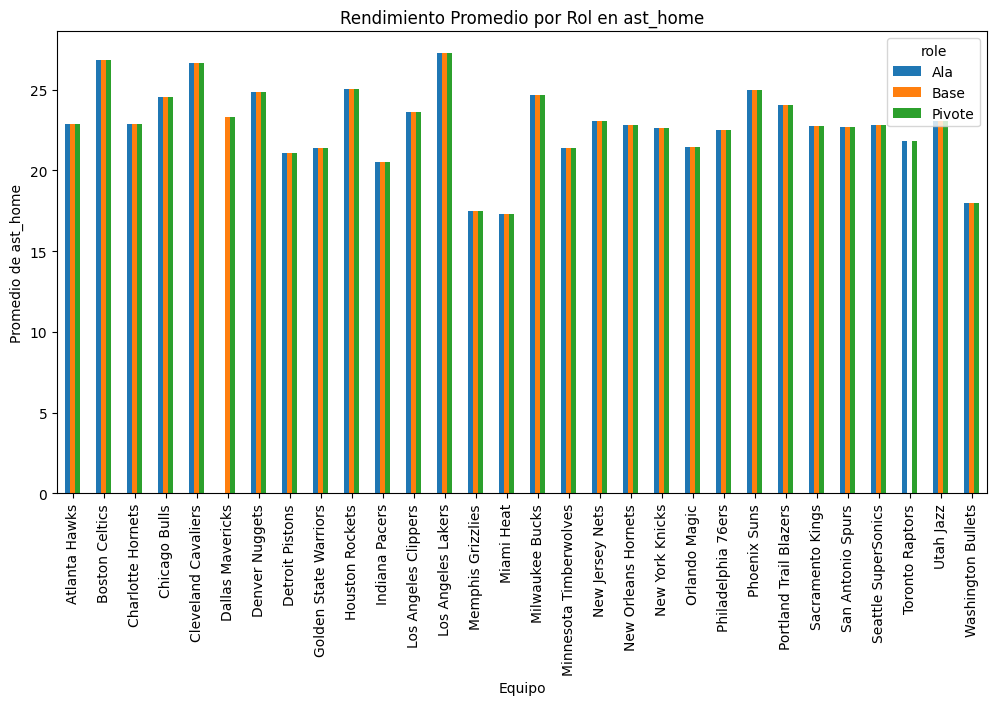

In [41]:
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

pivot_table_role = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'],
                                 index=['team_name_home', 'role'],
                                 aggfunc='mean')

print(pivot_table_role)

for stat in ['pts_home', 'reb_home', 'ast_home']:
  pivot_table_role[stat].unstack().plot(kind='bar', figsize=(12, 6))
  plt.title(f'Rendimiento Promedio por Rol en {stat}')
  plt.xlabel('Equipo')
  plt.ylabel(f'Promedio de {stat}')
  plt.xticks(rotation=90)
  plt.show()


# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

wl_home        L     W
position_y            
C            546  1055
C-PF         170   271
PF          1192  2321
PF-C         341   699
PF-SF        136   270
PG          1160  2362
PG-SG        243   554
SF           860  1600
SF-PF        256   459
SF-SG        152   270
SG          1355  2545
SG-PG        160   333
SG-SF        306   617


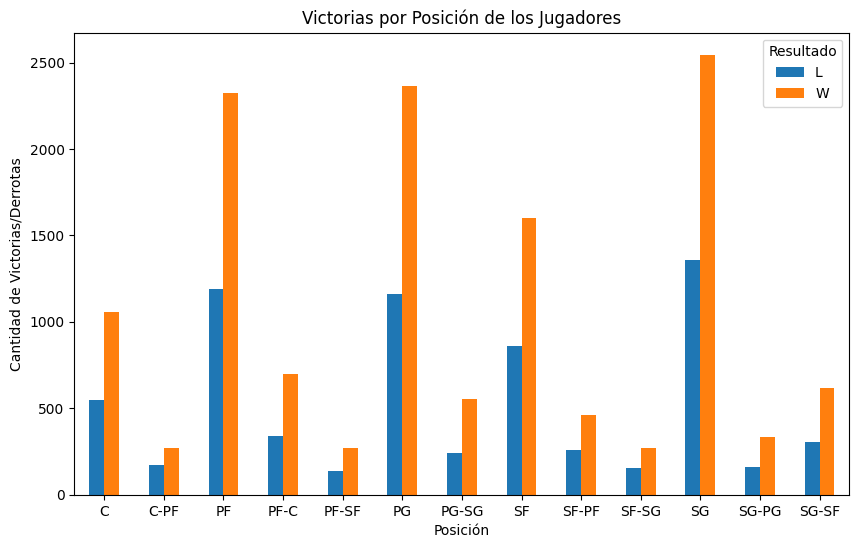


Porcentaje de victorias por posición:
position_y
C        0.658963
C-PF     0.614512
PF       0.660689
PF-C     0.672115
PF-SF    0.665025
PG       0.670642
PG-SG    0.695107
SF       0.650407
SF-PF    0.641958
SF-SG    0.639810
SG       0.652564
SG-PG    0.675456
SG-SF    0.668472
dtype: float64


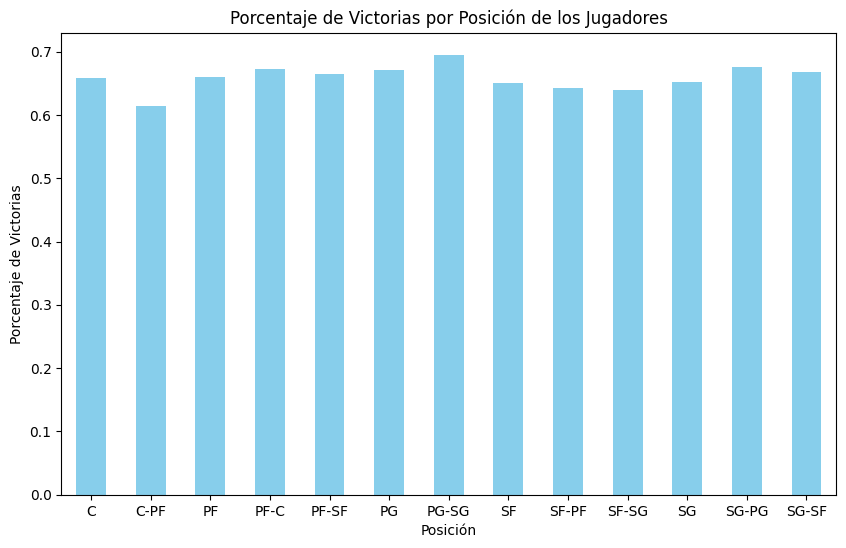

In [48]:
crosstab_wins_position = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
print(crosstab_wins_position)

crosstab_wins_position.plot(kind='bar', figsize=(10, 6))
plt.title('Victorias por Posición de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Cantidad de Victorias/Derrotas')
plt.xticks(rotation=0)
plt.legend(title='Resultado')
plt.show()

wins_percentage = crosstab_wins_position['W'] / (crosstab_wins_position['W'] + crosstab_wins_position['L'])
print("\nPorcentaje de victorias por posición:")
print(wins_percentage)

wins_percentage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Porcentaje de Victorias por Posición de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Porcentaje de Victorias')
plt.xticks(rotation=0)
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

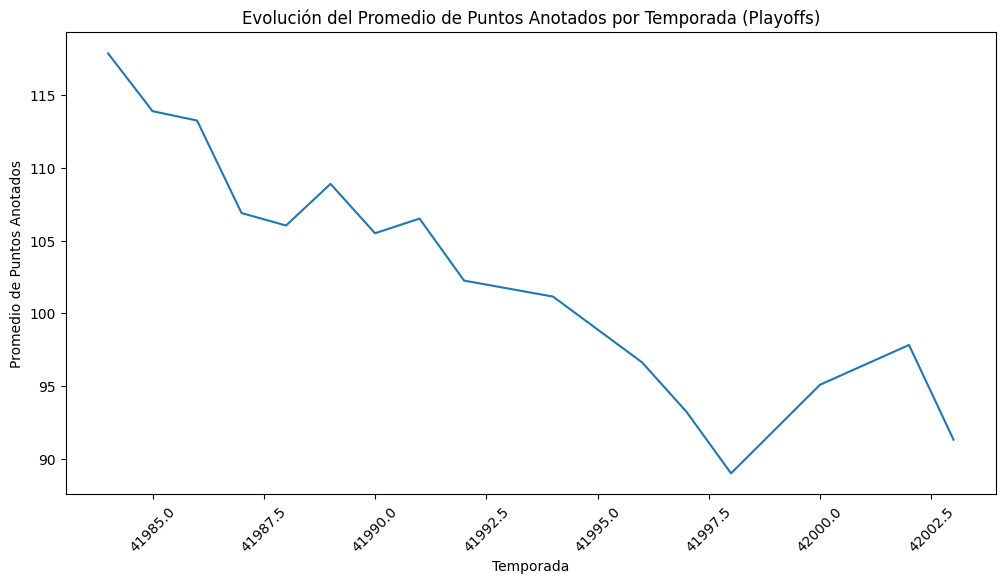

In [56]:
season_avg_points = games_playoffs.groupby('season_id')['pts_home'].mean()

season_avg_points.index = season_avg_points.index.astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x=season_avg_points.index, y=season_avg_points.values)

plt.title('Evolución del Promedio de Puntos Anotados por Temporada (Playoffs)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Anotados')
plt.xticks(rotation=45)

plt.show()


2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

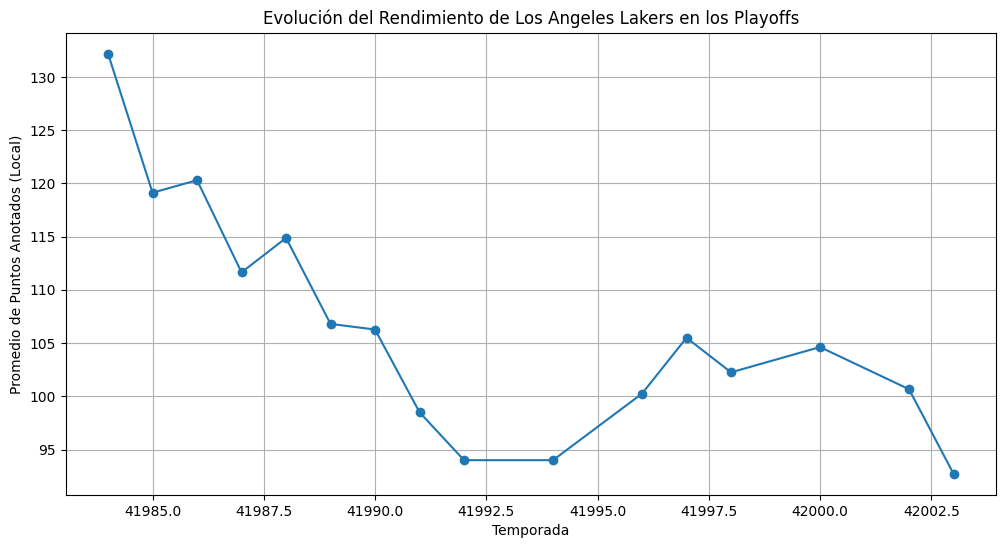

In [50]:
best_team_performance = games_playoffs[games_playoffs['team_name_home'] == best_team]

best_team_season_avg_points = best_team_performance.groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(best_team_season_avg_points.index.astype(int), best_team_season_avg_points.values, marker='o')  # Convert index to integer
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Anotados (Local)')
plt.title(f'Evolución del Rendimiento de {best_team} en los Playoffs')
plt.grid(True)
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

El jugador con más puntos anotados en los Playoffs es Rawle Alkins con 16784.0 puntos.


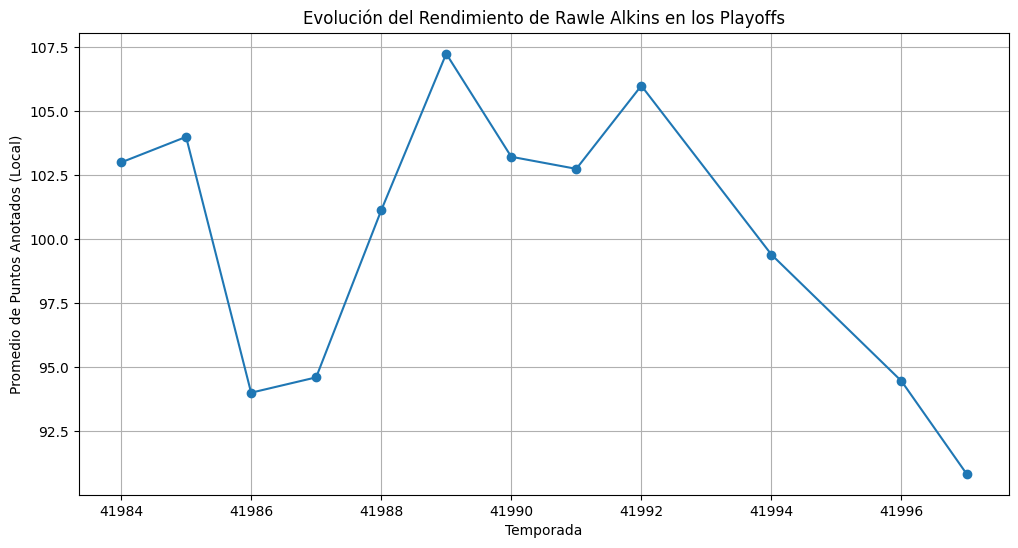

In [52]:
player_total_points = player_game_stats.groupby('person_id')['pts_home'].sum()

top_scorer_id = player_total_points.idxmax()
top_scorer_points = player_total_points.max()

top_scorer_name = player_game_stats[player_game_stats['person_id'] == top_scorer_id]['display_first_last'].iloc[0]

print(f"El jugador con más puntos anotados en los Playoffs es {top_scorer_name} con {top_scorer_points} puntos.")

top_scorer_performance = player_game_stats[player_game_stats['person_id'] == top_scorer_id]
top_scorer_season_avg_points = top_scorer_performance.groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(top_scorer_season_avg_points.index.astype(int), top_scorer_season_avg_points.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Anotados (Local)')
plt.title(f'Evolución del Rendimiento de {top_scorer_name} en los Playoffs')
plt.grid(True)
plt.show()

4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

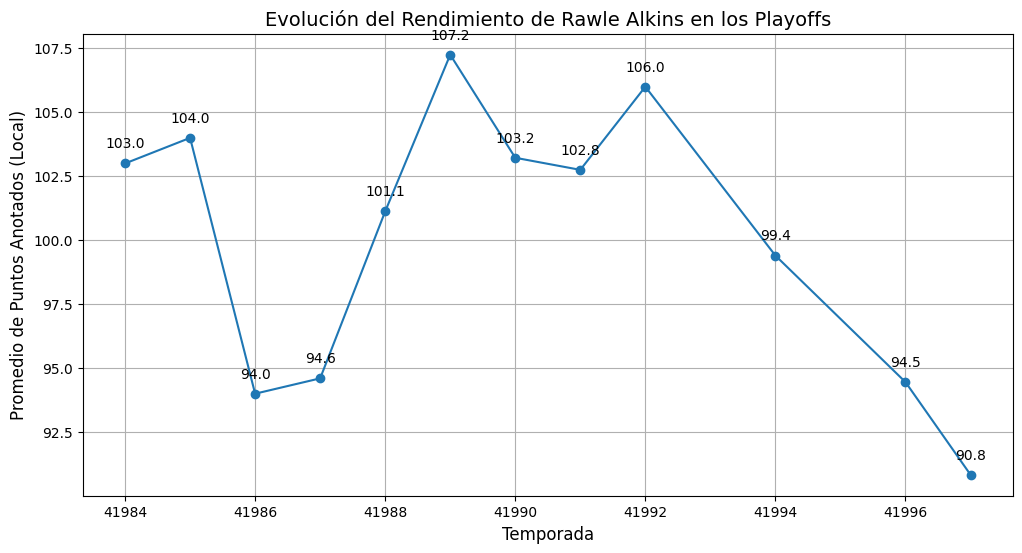

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(top_scorer_season_avg_points.index.astype(int), top_scorer_season_avg_points.values, marker='o', linestyle='-') #Added linestyle
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Promedio de Puntos Anotados (Local)', fontsize=12)
plt.title(f'Evolución del Rendimiento de {top_scorer_name} en los Playoffs', fontsize=14)
plt.grid(True)

for i, v in enumerate(top_scorer_season_avg_points.values):
    plt.text(top_scorer_season_avg_points.index.astype(int)[i], v + 0.5, f'{v:.1f}', ha='center', va='bottom')

plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

Top 10 Players by Average Points Per Game in Playoffs (1984-2003):
display_first_last
Luke Babbitt        2.481982
Trevon Bluiett      2.481982
Herbert Jones       2.481982
Dante Cunningham    2.481982
Tony Snell          2.481982
Naji Marshall       2.481982
Nicolo Melli        2.481982
David West          2.481982
Omer Asik           2.481982
Garrett Temple      2.481982
Name: ppg, dtype: float64


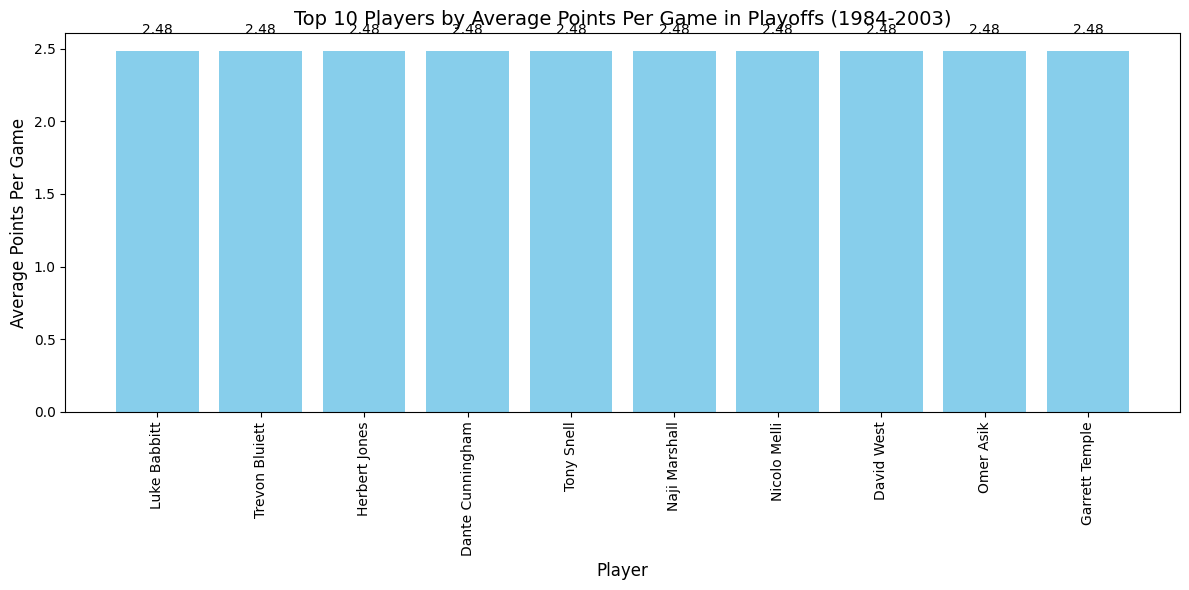

In [54]:
player_game_stats['ppg'] = player_game_stats['pts_home'] / player_game_stats['game_id'].map(player_game_stats.groupby('game_id')['game_id'].count())

player_avg_ppg = player_game_stats.groupby('display_first_last')['ppg'].mean().sort_values(ascending=False)

print("Top 10 Players by Average Points Per Game in Playoffs (1984-2003):")
print(player_avg_ppg.head(10))

plt.figure(figsize=(12, 6))
plt.bar(player_avg_ppg.head(10).index, player_avg_ppg.head(10).values, color='skyblue')
plt.xlabel("Player", fontsize=12)
plt.ylabel("Average Points Per Game", fontsize=12)
plt.title("Top 10 Players by Average Points Per Game in Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)

for i, v in enumerate(player_avg_ppg.head(10).values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

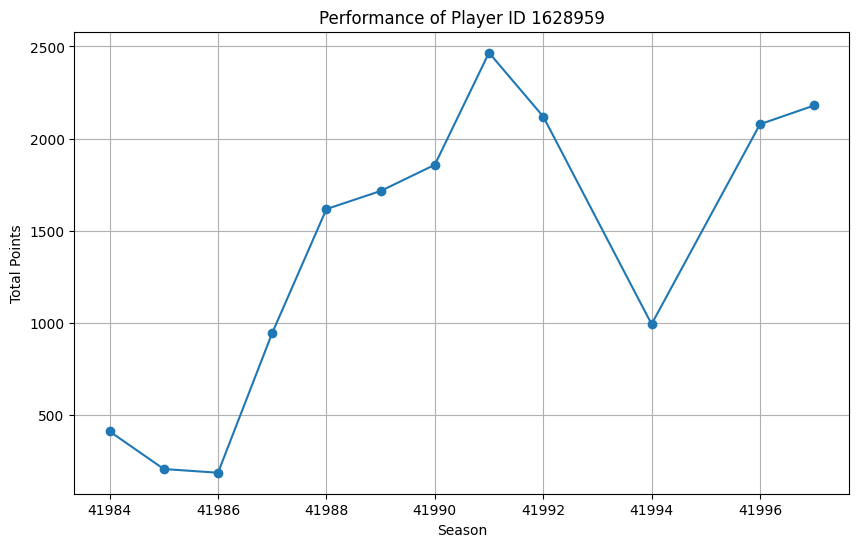

Player Name: Rawle Alkins


In [57]:
player_total_points = player_game_stats.groupby('person_id')['pts_home'].sum()
top_scorer_id = player_total_points.idxmax()

specific_player_stats = player_game_stats[player_game_stats['person_id'] == top_scorer_id]

player_season_points = specific_player_stats.groupby('season_id')['pts_home'].sum()

plt.figure(figsize=(10, 6))
plt.plot(player_season_points.index.astype(int), player_season_points.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title(f"Performance of Player ID {top_scorer_id}")
plt.grid(True)
plt.show()

player_info = players_df[players_df['person_id'] == top_scorer_id][['first_name', 'last_name']]
player_name = player_info['first_name'].iloc[0] + ' ' + player_info['last_name'].iloc[0]
print(f"Player Name: {player_name}")

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

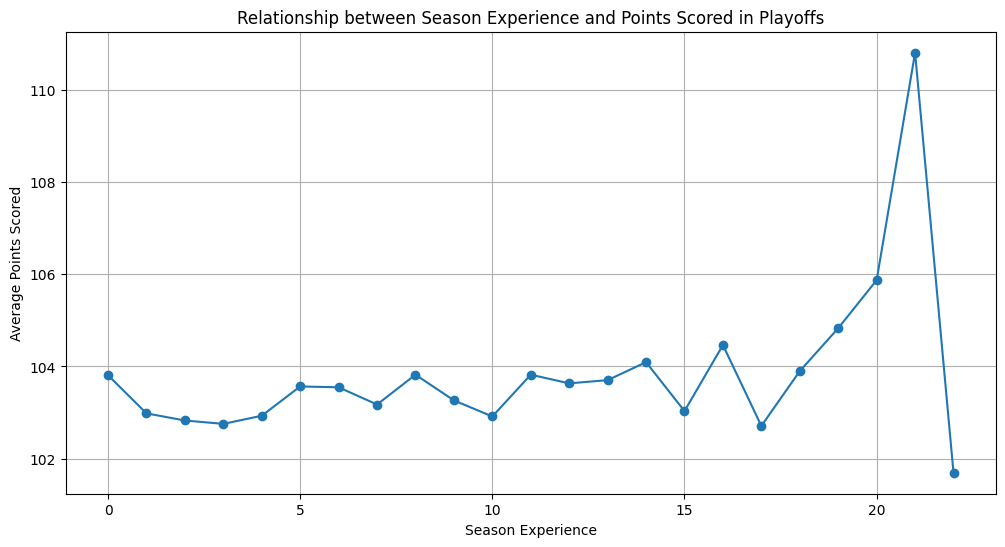

season_exp
0.0     103.809211
1.0     102.982510
2.0     102.828227
3.0     102.754828
4.0     102.931582
5.0     103.566300
6.0     103.547642
7.0     103.174579
8.0     103.820821
9.0     103.263734
10.0    102.915519
11.0    103.821114
12.0    103.633074
13.0    103.702804
14.0    104.092077
15.0    103.032619
16.0    104.463252
17.0    102.710407
18.0    103.898623
19.0    104.828671
20.0    105.869159
21.0    110.797297
22.0    101.696629
Name: pts_home, dtype: float64

Correlation between season experience and points scored: 0.023714295570994016


In [58]:
experience_avg_points = player_game_stats.groupby('season_exp')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(experience_avg_points.index, experience_avg_points.values, marker='o')
plt.xlabel('Season Experience')
plt.ylabel('Average Points Scored')
plt.title('Relationship between Season Experience and Points Scored in Playoffs')
plt.grid(True)
plt.show()

print(experience_avg_points)

correlation = player_game_stats['season_exp'].corr(player_game_stats['pts_home'])
print(f"\nCorrelation between season experience and points scored: {correlation}")

* Juagador es:

Rawle Alkins

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?